<a href="https://colab.research.google.com/github/labibahanastu/MachineLearning_Assignment/blob/main/ML_Week8_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##SUPPORT VECTOR MACHINES

1. Introduction to Support Vector Machines 
Table of Contents

Support Vector Machines (SVMs in short) are machine learning algorithms that are used for classification and regression purposes. SVMs are one of the powerful machine learning algorithms for classification, regression and outlier detection purposes. An SVM classifier builds a model that assigns new data points to one of the given categories. Thus, it can be viewed as a non-probabilistic binary linear classifier.

The original SVM algorithm was developed by Vladimir N Vapnik and Alexey Ya. Chervonenkis in 1963. At that time, the algorithm was in early stages. The only possibility is to draw hyperplanes for linear classifier. In 1992, Bernhard E. Boser, Isabelle M Guyon and Vladimir N Vapnik suggested a way to create non-linear classifiers by applying the kernel trick to maximum-margin hyperplanes. The current standard was proposed by Corinna Cortes and Vapnik in 1993 and published in 1995.

SVMs can be used for linear classification purposes. In addition to performing linear classification, SVMs can efficiently perform a non-linear classification using the kernel trick. It enable us to implicitly map the inputs into high dimensional feature spaces.

##Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##Import and Read the Dataset

In [ ]:
#importing the data 

train_df= pd.read_csv('train.csv')

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train_df.shape

(891, 12)

In [ ]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train_df['Survived'].value_counts()

# survived = 1
# didn't survive = 0

0    549
1    342
Name: Survived, dtype: int64

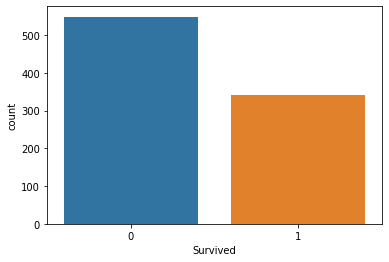

In [ ]:
sns.countplot(data=train_df, x='Survived')

# survived = 1
# didn't survive = 0

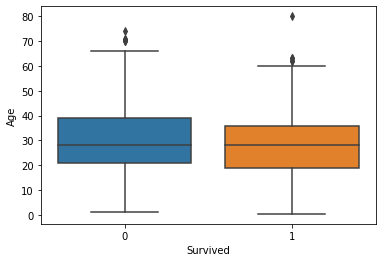

In [ ]:
sns.boxplot(data=train_df, x='Survived', y='Age')

# survived = 1
# didn't survive = 0

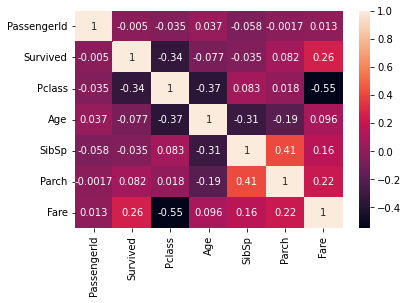

In [ ]:
sns.heatmap(train_df.corr(), annot=True)

In [ ]:
#Data preparation
#looking for null values and taking care of them

train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
train_df["Age"].fillna(train_df["Age"].mean(), inplace = True)

In [ ]:
train_df['Sex']=train_df['Sex'].replace('male', 0)
train_df['Sex']=train_df['Sex'].replace('female', 1)

In [ ]:
train_df.drop(['Name', 'PassengerId', 'Fare', 'Ticket','Embarked', 'Cabin'], axis = 1, inplace = True)

In [ ]:
train_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
dtype: int64

In [ ]:
missing=train_df.isnull().sum().sort_values(ascending=False)
missing=missing.drop(missing[missing==0].index)
missing

Series([], dtype: int64)

In [ ]:
#defining features and the label

X= train_df.drop('Survived', axis=1)
y= train_df['Survived']

In [ ]:
#spliting the dataset to work on train and test


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
#feature scaling


from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [ ]:
scaled_X_train= scaler.transform(X_train)
scaled_X_test= scaler.transform(X_test)

In [ ]:
#training the model


from sklearn.svm import SVC

SVC_model= SVC()
SVC_model.fit(scaled_X_train, y_train)

SVC()

In [ ]:
#predicting test

y_pred= SVC_model.predict(scaled_X_test)

#testing the model

from sklearn.metrics import classification_report, confusion_matrix

confusion_matrix(y_test, y_pred)

array([[138,  16],
       [ 35,  79]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.90      0.84       154
           1       0.83      0.69      0.76       114

    accuracy                           0.81       268
   macro avg       0.81      0.79      0.80       268
weighted avg       0.81      0.81      0.81       268

